## Chaos In Music Listening Habits
Name: Marco Lazzarato  
Class: CPSC 222 Introduction to Data Science, Spring 2022


## Introduction

Why is the domain important to you and why you are researching in this domain  
The domain is important to me because music and music genres can be incredibly varied and surprisingly specific. 

What is the dataset format (e.g. CSV files, JSON files, a mix of the two, etc.)  
The dataset is all JSON files.

What tables (emphasis on the plural here) are included in the dataset  
The dataset include both my streaming history and the songs that are saved in my Spotify library

How is the data in each table collected  
The data is collected automatically by Spotify whenever I listen to a song or add it to my library respectively.

How many instances are there in each table  
There are 883 instances in my library and several thousand instances in my streaming history, around 7,400 although I do not know the exact number since they are not indexed.

Include a brief description of the attributes  
In my library each song has attributes for the song name, the artist name, the album name and the uri code that spotify uses to identify the song. In my streaming history each song has the artist name, the track name, the ms played and the when the song ended. I am using a music api to get genre information and appending it to the tables.

What are you trying to classify in the dataset  
I am trying to classify the genre of each song and seeing how it relates to the other attributes, and if the ordering of genres in both my library and history are chaoitic.

What are potential impacts of the results  
I think that it could be really interesting to know if listening habits are chaotiv, because if they are it means that algorithms would be limitid in how well they can predict what you will like or want to listen to, on the other hand if they are not chaotic then it should be easier to predict and we could predict songs farther into someone's listening session.

Who are stakeholders interested in your results  
Anyone who would want to write algorithms to predict the music genres that someone wants to listen to.




## Data Analysis

What cleaning of the dataset did you need to perform (e.g.. are there missing values and how did you handle the missing values) 
There are some missing values in the initial data set that make the API not return a request properly so, since I have so many instances I am just dropping the values that don't return correctly. 

How are you merging the tables  
I am splitting the tables into genres and the merging the genres from my library and history to creatue unified genre tables that can draw on both.

What are challenges with data preparation  
The main challenges with data preparation are picking out the information I need to format a request to the API correctly, and figuring out how to set up the data for the hypothesis tests given the large amount of categorical data.

In [34]:
import utils
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import importlib


In [11]:
hist_df = pd.read_json("MyData/StreamingHistory0.json")
lib_df = json.load(open("MyData/YourLibrary.json"))
lib_df = pd.DataFrame(lib_df["tracks"])

hist_df_slice = hist_df.iloc[(len(hist_df) - 11):(len(hist_df) -1)].copy(deep=True)
lib_df_slice = lib_df[(len(lib_df) - 11):(len(lib_df) -1)].copy(deep=True)

lib_terms =lib_df_slice["track"] + " " + lib_df_slice["artist"]
hist_terms = hist_df_slice["trackName"] + " " + hist_df_slice["artistName"]

lib_genres = []
hist_genres = []

for item in lib_terms:
    lib_genres.append(utils.get_genre(item))
    
for item in hist_terms:
    hist_genres.append(utils.get_genre(item))
    

In [26]:
hist_df_slice["genres"] = hist_genres
lib_df_slice["genres"] = lib_genres

hist_by_genres = hist_df_slice.groupby("genres")

hist_genres_count = hist_df_slice["genres"].value_counts()
lib_genres_count = lib_df_slice["genres"].value_counts()

hist_msPlayed_mean = hist_by_genres["msPlayed"].mean()

genre_to_numeric = {"Hard Rock": 1, "Metal": 2, "Alternative": 3, "Dance": 4, "Soundtrack": 5, "Singer/Songwriter": 6}

hist_genres_numeric = []
hist_genres_numeric_idx = []
idx = 0

for item in hist_genres:
    hist_genres_numeric.append(genre_to_numeric[item])
    hist_genres_numeric_idx.append(idx)
    idx += 1

total_genres =  hist_genres.copy()
for item in lib_genres:
    total_genres.append(item)
total_genres = pd.Series(total_genres)


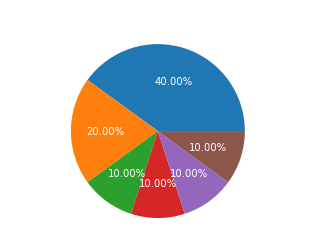

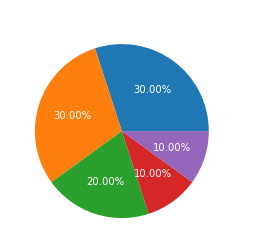

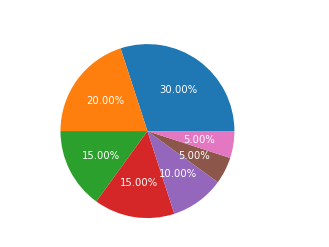

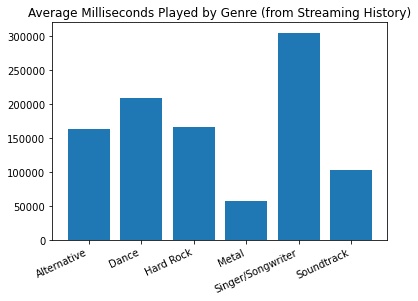

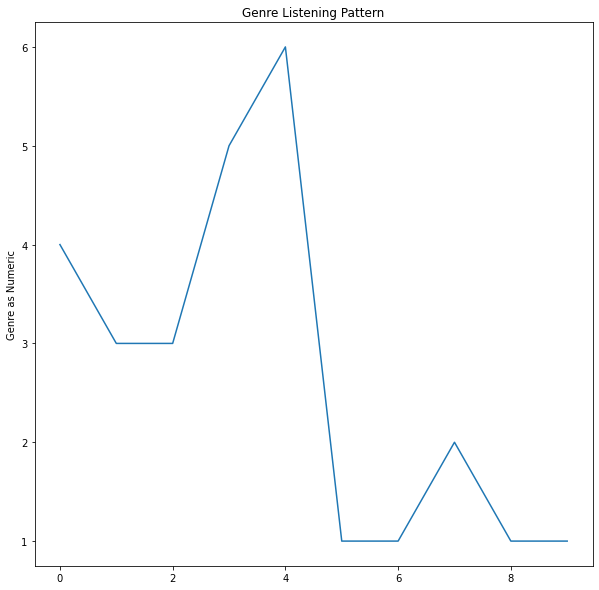

In [90]:
plt.figure()
plt.rcParams.update({'text.color': 'white'})
plt.pie(hist_genres_count, labels = hist_genres_count.index, autopct="%.2f%%")
plt.title("Streaming History Genre Distribution")
plt.show

plt.figure()
plt.pie(lib_genres_count, labels = lib_genres_count.index, autopct="%.2f%%")
plt.title("Library Genre Distribution")
plt.show()

plt.figure()
plt.title("Total Genre Distribution")
plt.pie(total_genres.value_counts(), labels = total_genres.value_counts().index, autopct="%.2f%%")
plt.show()

plt.figure()
plt.rcParams.update({'text.color': 'black'})
plt.bar(hist_msPlayed_mean.index, hist_msPlayed_mean)
plt.xticks(rotation=25, ha="right")
plt.title("Average Milliseconds Played by Genre (from Streaming History)")
plt.show()

plt.figure(figsize=(10, 10))
plt.title("Genre Listening Pattern")
plt.ylabel("Genre as Numeric")
plt.plot(hist_genres_numeric_idx, hist_genres_numeric)
plt.savefig("Genre Listening Pattern")
plt.show()

[1.9976717365835515]


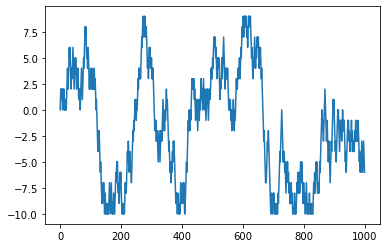

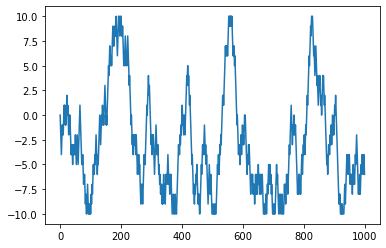

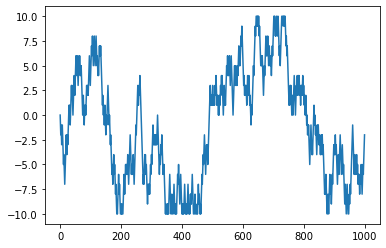

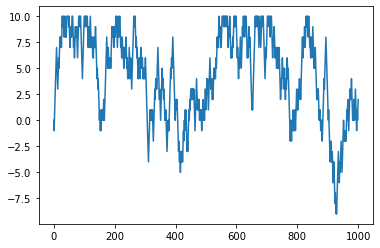

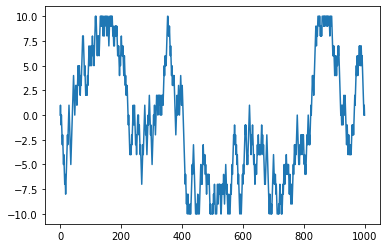

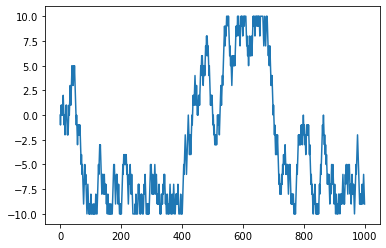

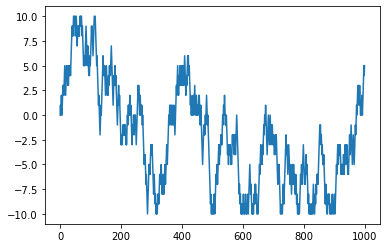

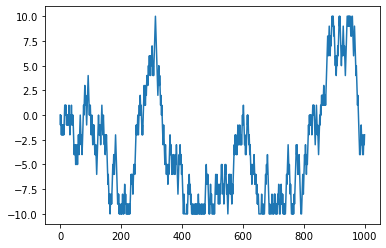

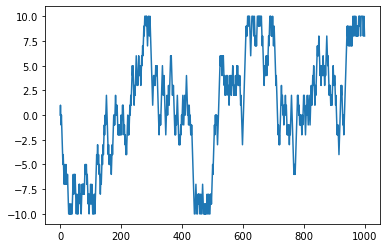

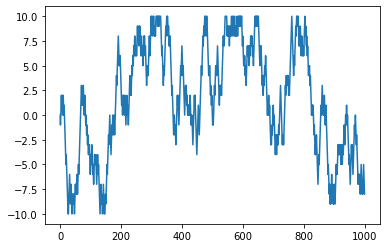

In [80]:
importlib.reload(utils)
rand_walks = utils.gen_rand_walks(10)
dimensions = utils.box_count(rand_walks)
genre_dimension = utils.box_count(["Genre Listening Pattern.png"])

## Hypothesis Tests

Null Hypothesis: The fractal dimension of the graph of the genres in my Spotify history indicates it is chaotic.  
$\mu = 1.99$  
Alternative Hypothesis: The fractal dimension of the graph of the genres in my Spotify history indicates it is not chaotic  
$\mu \ne 1.99$  
Level of Significance: 0.01   
Test Statistic will be t  
t-critical is 2.821

In [89]:
from scipy import stats
data = pd.Series(dimensions)
alpha = 0.01
t_computed, p_value = stats.ttest_1samp(data, genre_dimension[0])

if p_value < alpha:
    print("Reject the Null Hypothesis")
else:
    print("Do not reject the null hypothesis")

Reject the Null Hypothesis


In [115]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

x_train = hist_df_slice["msPlayed"]
x_train = x_train.values.reshape(-1, 1)
y_train = hist_df_slice["genres"]

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_normalized = scaler.transform(x_train)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_normalized, y_train)

x_test = pd.Series([60000])
x_test = scaler.transform([x_test])
y_test_prediction = neigh.predict(x_test)
print(y_test_prediction)

['Hard Rock']


## Classification Results
What attribute are you using as class information (i.e., what attribute or attributes are you predicting)  
I am predicting the genre attribute.  
What are your hypotheses about the predictions  
I think that my history is probably chaotic  
What are challenges with classification  
The challenges with classification were that most of my data was categorical and we had worked with preominantly numeric data in class.  
 


## Conclusion
The data set I used had a very small sample of songs since I didn't want have very long run times due to the API requests that I have to make to get the genre data that I am using. The actual data is mostly categorical with a few numeric attributes, which made it more challenging to manipulate. Additionally, I had to develop a function to compute the fractal dimension of images that were passed to it, which was also very difficult. 
Describe the potential impacts of your work (including ethical impacts) for the stakeholder’s you described in the introduction.  
The potential impact is that now I can confirm that it is possible to make long term predictions on what someone will listen to, it doesn't have to just be limited to the next few songs.